<br>

<center>Flight Delay Prediction- ML</center>

Each year, around 20% of airline flights experience delays or cancellations, primarily  attributed to factors such as adverse weather conditions, carrier equipment issues, and technical problems at airports. These delays incur substantial costs for both airlines and passengers. For example, in 2007, flight delays were estimated to have cost the US economy $32.9 billion, with more than half of the financial burden borne by passengers (Ball et al., 2010). Accurate and timely weather forecasts are essential to making informed decisions and minimizing potential risks. 
<br><br>
In this Jupyter notebook: Four machine learning classifiers decision tree, random forest, logistic regression, and Gausian NBwere developed and their performance was assessed based on the prepared data.


## Loading the neccessary libraries and packages

In [1]:
# pandas used for data manipulation and analysis, providing data structures like DataFrames for working with tabular data. 
import pandas as pd  
# numpy is numerical Python, the fundamental package for scientific computing in Python.  
import numpy as np    
# seaborn is a data visualization library based on Matplotlib that designed to create informative and attractive statistical graphics.
import seaborn as sns

# A common library for creating static, animated, and interactive visualizations in Python.
import matplotlib                    # pyplot module

# Pretty-print lists, tuples, & dictionaries recursively in a human-readable format.
import pprint                        

# Providing a high level interface for creating various types of plots and charts.
import matplotlib.pyplot as plt 

In [2]:
# Taking care of jupyter environment 
# show graphs in-line, and turn on/off pretty_printing of lists
%matplotlib inline 
%pprint       

Pretty printing has been turned OFF


In [3]:
#ignore warning 
import warnings
warnings.filterwarnings("ignore")

In [4]:
# retina quality: to better display the plots. Any display with retina resolution will make the figures look better
# if your monitor's resolution is sub-retina than the improvement will be less noticeable [2].
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

#### Reading Data from Files

In [16]:
# Read the features and labels csv files created from the previous file
X = pd.read_csv('flightdelay_features.csv').to_numpy() 
y = pd.read_csv('flightdelay_labels.csv').to_numpy().reshape(-1)

#### Observing and describing data

In [20]:
print(X, X.shape)

[[ 0.64608124 -0.19790155 -0.07142458 ... -0.19869827 -0.010031
  -0.04950964]
 [-0.24850538 -0.08099072  0.61167012 ... -0.25204769 -0.1400736
   0.08124148]
 [ 0.77087016 -0.30282252 -0.4088514  ... -0.02361534  0.06659904
  -0.05760408]
 ...
 [ 0.56117762 -0.17347274  0.43808623 ...  0.0495726   0.05154949
  -0.29510212]
 [ 0.30612197 -0.0882988  -0.15566021 ... -0.07319115 -0.15950104
   0.21921444]
 [ 0.75454737 -0.44025934 -0.0748583  ... -0.21905507 -0.14196113
  -0.08897292]] (809568, 15)


In [21]:
print(y,y.shape)

[0 0 0 ... 1 1 1] (809568,)


<br>

### Supervised ML

In [24]:
# Import scikit-learn packages and libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report      # import library for confusion matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 

#### Split the data into train set and test set

Before deploying an ML model in an industry setting, it's crucial to ensure that the model generalizes effectively to unseen test data, thereby avoiding overfitting. Overfitting is a common concept in data science, indicating that a model has learned the training data too well but struggles with new, unseen data. To assess whether overfitting is occurring, we typically split the dataset into two parts: a training set and a test set. 

- Training Set (X_train, y_train) - 70% ( 566697 samples): This portion is used to train the ML model.
- Testing Set  (X_test, y_test)   - 30% ( 242871 samples): This portion is reserved for evaluating and assessing the model's performance.

The Scikit-Learn library provides a convenient built-in function called train_test_split to facilitate this data splitting process. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # test set= 20% and the random seed=42

Using random_state=42 (or any integer) is a way to set the random seed for the randomization process, ensuring the reproducibility of results. In simpler terms, employing the same random_state value will consistently produce the same data split each time the code is run, resulting in identical outcomes. Reproducibility is of significant importance in data science and various other domains. [https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79]

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(566697, 15) (566697,) (242871, 15) (242871,)


<br>

Let's build multiple supervised machine learning models and assess their performance on the resampled dataset to identify the model that achieves the highest accuracy.

### Decision Tree Classifier 

Choosing the appropriate value for the maximum depth parameter ('max_depth') is crucial when working with decision tree-based algorithms, such as decision trees or random forests. The 'max_depth' parameter controls the depth or the number of levels of the tree. One approach to selecting the 'max_depth' parameter is by plotting learning curves, which demonstrate how model performance changes with increasing 'max_depth'. This approach can assist in identifying the point at which further increases in depth do not significantly improve performance on the validation set.

In [ ]:
Maxdepth_list = np.arange(3, 30,3)

Accuracy: [59.913287300665786, 62.052282899152225, 66.93923934928418, 74.88213907794673, 81.46011668745959, 84.8981558111096, 86.3013698630137, 86.82304597914118, 87.03921011565811]


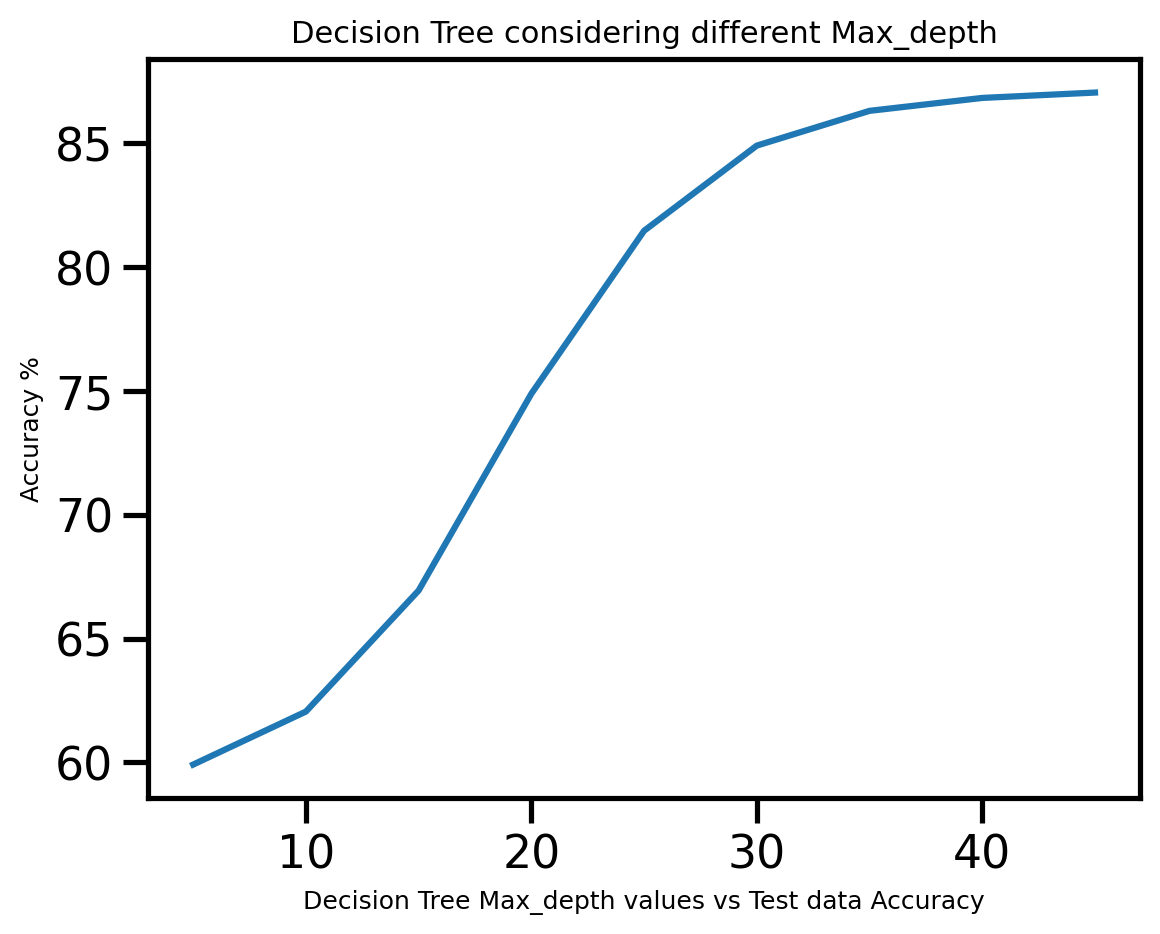

In [29]:
# Determine the best value for Max_depth
Maxdepth_list =   np.arange(5,50,5)
Decision_accuracy = []
for depth in Maxdepth_list:
    # creat the decisiontree classifier to train the data 
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=0)
    classifier.fit(X_train,y_train)

    # predicition vale
    y_pred = classifier.predict(X_test)
        
    # Model accuracy
    accuracy = accuracy_score(y_test,y_pred)*100
    Decision_accuracy. append(accuracy)

# Print the accuracy list
print("Accuracy:", Decision_accuracy)

# Plot The Learning Curve to determine the best accuracy

# Visualise the accuracy based on the tree max_depth
plt.title('Decision Tree considering different Max_depth',fontsize = 11)
plt.plot(Maxdepth_list, Decision_accuracy)
# ,'ro-',label = 'Testing Accuracy')
# plt.plot(neighbors, train_accuracy,'bo-', label = 'Training accuracy')
# plt.legend()

plt.xlabel('Decision Tree Max_depth values vs Test data Accuracy',fontsize=9)
plt.ylabel('Accuracy %', fontsize=9)
plt.show()

The previous figure illustrates a significant improvement in model performance as the 'max_depth' parameter increases. Therefore, to avod the overfitting the max depth will set to 35.

In [31]:
# creat the decisiontree classifier to train the data 
dt_classifier = DecisionTreeClassifier(max_depth=35, random_state=0)
dt_classifier.fit(X_train,y_train)

#  DecisionTree Parameters
# pprint.pprint(dt_classifier.get_params())

DecisionTreeClassifier(max_depth=35, random_state=0)

In [37]:
# predicition 
y_pred = dt_classifier.predict(X_test)

# Construct the Confusion Matrix and the classification report
dt_cm = confusion_matrix(y_test,y_pred)
# sns.heatmap(dt_cm,annot=True);
print(classification_report(y_test,y_pred))

# Model accuracy
print( "Training Accuracy at max_depth = 35 is: {:.2f}%".format(accuracy_score(y_train, classifier.predict(X_train))*100) ) 
print( "Test Accuracy at max_depth = 35 is: {:.2f}%".format(accuracy_score(y_test, y_pred)*100) ) 

              precision    recall  f1-score   support

           0       0.95      0.76      0.85    121398
           1       0.80      0.96      0.88    121473

    accuracy                           0.86    242871
   macro avg       0.88      0.86      0.86    242871
weighted avg       0.88      0.86      0.86    242871

Training Accuracy at max_depth = 35 is: 99.93%
Test Accuracy at max_depth = 35 is: 86.30%


At a max_depth of 35, from figure [16] the model's precision for predicting no flight delay (class 0) stands at 0.95, meaning 95% of such predictions are accurate. Conversely, for predicting delays (class 1), the precision drops slightly to 0.80. In terms of recall, the model correctly identifies 76% of the actual no delay cases, while remarkably capturing 96% of genuine delay instances. The F1-scores, which provide a balanced view of precision and recall, are 0.85 and 0.88 for class 0 and class 1 respectively. Although the model boasts a stellar training accuracy of 99.93%, the test accuracy is lower at 86.30%, hinting at a potential overfitting to the training data.

[[ 92843  28555]
 [  4715 116758]]


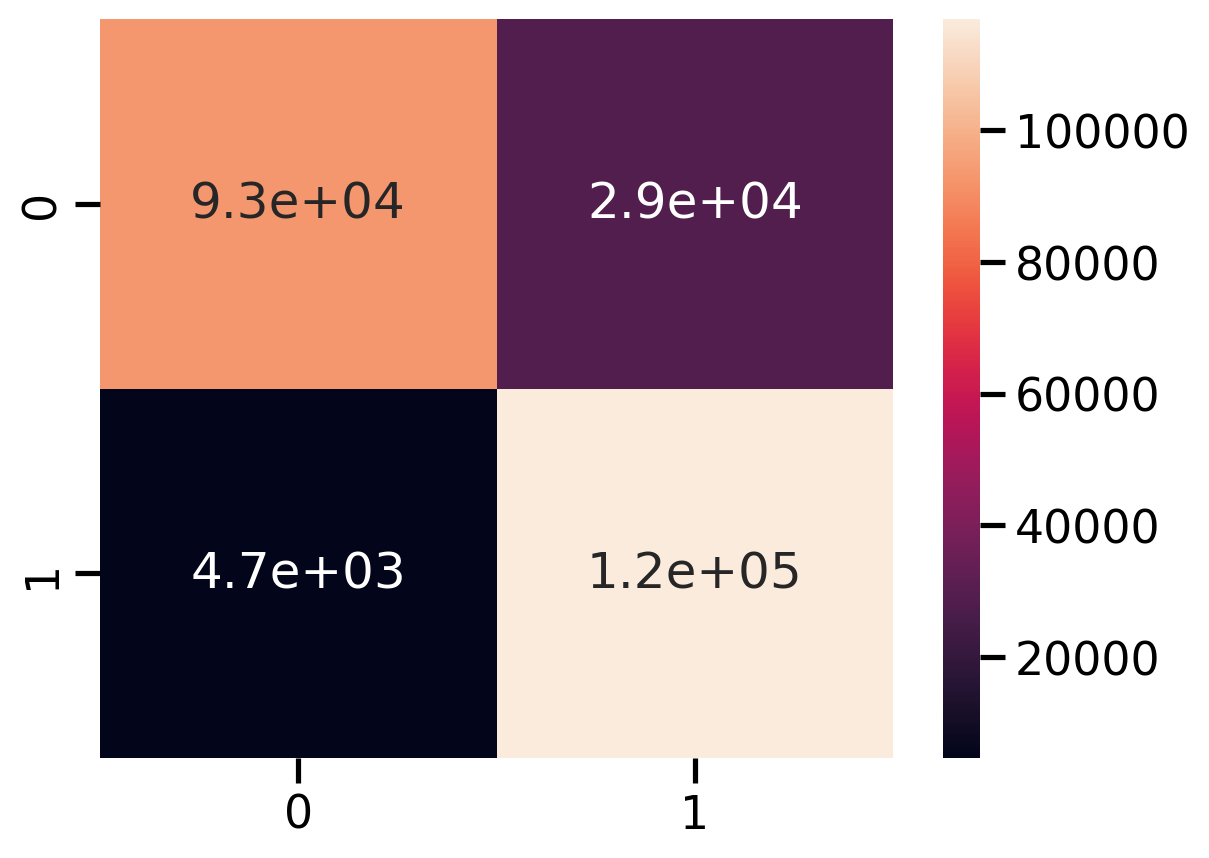

In [34]:
print(dt_cm)
sns.heatmap(dt_cm,annot=True); 

<b>Evaluation:</b> The model's high training accuracy of 99.93% suggests that it has learned the patterns in the training data almost perfectly. However, when we look at the test accuracy of 86.30%, we see a significant drop. This discrepancy could indicate that the model may be overfitting to the training data and might not be generalizing perfectly to unseen data. While the precision and recall for class 1 are commendable, the recall for class 0 is comparatively lower at 76%. This means that there's a higher rate of false negatives for 'No delay'class, leading to missed predictions.

<br>

###  Gaussian Naive Bayes (GNB) classifier:

Naive Bayes:
Naive Bayes algorithms are supervised learning algorithm that uses Bayes’ theorem to predict the class of a new piece of data. The algorithm assumes that the features of the data are independent, which means that the class of a data point does not depend on the values of any of the other data points.

scikit-learn.org. (n.d.). 1.9. Naive Bayes — scikit-learn 0.24.2 documentation. [online] Available at: http://scikit-learn.org/stable/modules/naive_bayes.html.

In [38]:
# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train) 

GaussianNB()

              precision    recall  f1-score   support

           0       0.62      0.55      0.58    121398
           1       0.59      0.66      0.63    121473

    accuracy                           0.60    242871
   macro avg       0.60      0.60      0.60    242871
weighted avg       0.60      0.60      0.60    242871

Training Accuracy for GaussianNB model is: 60.38%
Test Accuracy for GaussianNB model is: 60.36%


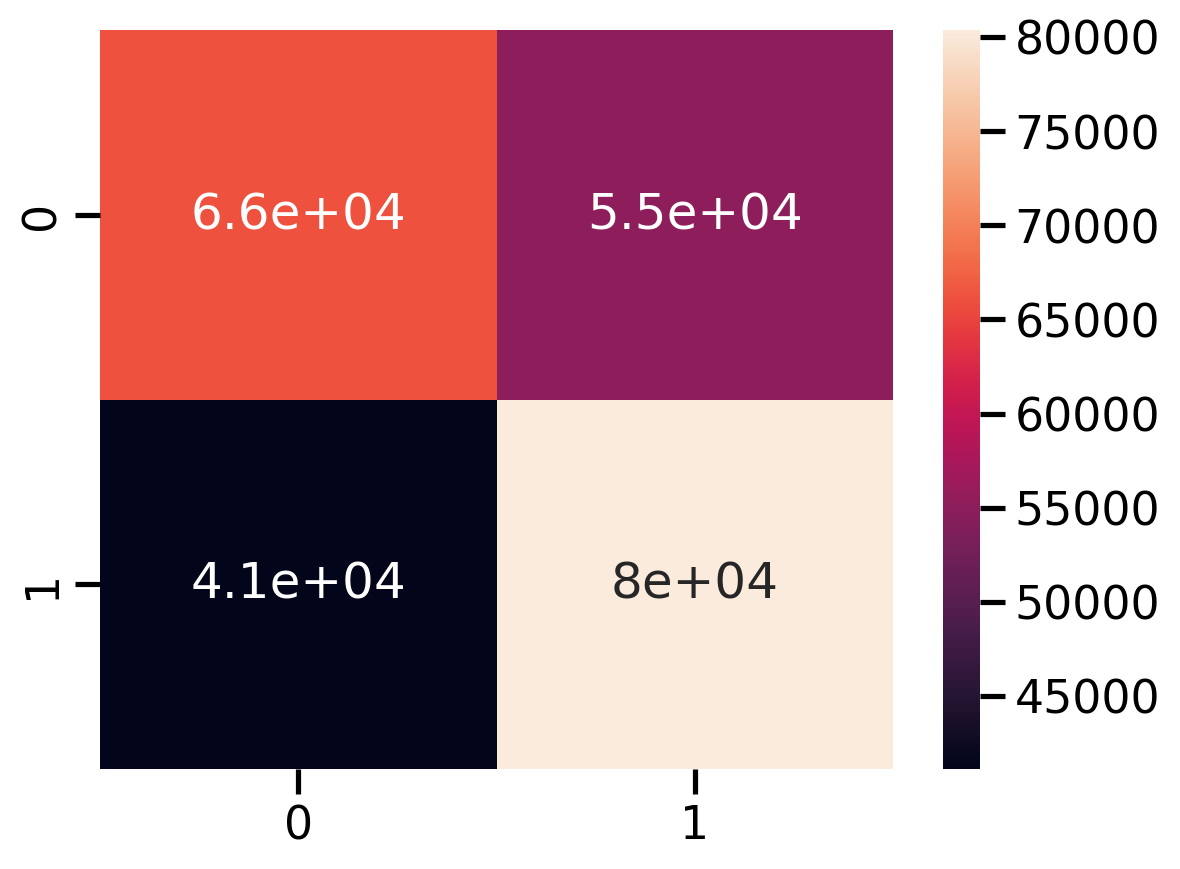

In [39]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test) 

# Construct the Confusion Matrix and the classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot= True)
print(classification_report(y_test,y_pred))

# Model accuracy
print( "Training Accuracy for GaussianNB model is: {:.2f}%".format(accuracy_score(y_train, nvclassifier.predict(X_train) )*100) )
print( "Test Accuracy for GaussianNB model is: {:.2f}%".format(accuracy_score(y_test, y_pred)*100) )

* Precision and Recall: 
- 'No Delay' instances (Class 0):
Precision (P0) = 0.62: 62% of predicted that flight not delayed were accurate.
Recall (R0) = 0.55: The model correctly spotted 55% of actual "No Delay" instances.

- 'Delayed' instances (Class 1):
Precision (P1) = 0.59: 59% of predicted that the flights are delayed were accurate.
Recall (R1) = 0.66: Only 66% of flights that are actually delayed were correctly predicted.

* F1-Score:
F1-Score, a balance of precision and recall, was 0.58 for Class 0 and 0.63 for Class 1.

* Support:
Class 0 had 121398 instances, while Class 1 had  121473 instances.

* Accuracy:
Overall model accuracy was about 60%, meaning approximately 60% of predictions were correct.

* Macro Average:
Precision: 0.60 Recall: 0.60, F1-Score: 0.60 (averaged across both classes).

* Weighted Average:
Precision: 0.60, Recall: 0.60, F1-Score: 0.60 (weighted by the number of samples). 

<b>Evaluation:</b>
The results suggest that the GaussianNB model exhibits a consistent performance across both training and test datasets, indicating an absence of overfitting. It's noteworthy that while the model was marginally more accurate in predicting flights without delays, its precision dipped slightly when identifying actual delays. Interestingly, the model demonstrated a higher recall for flights with delays than for those without, implying its heightened sensitivity towards detecting actual delays. The F1-scores for both classes confirm that the model's performance is relatively balanced, though there is room for improvement, especially when the objective is to classify flight delays due to weather conditions with higher precision. The model is unbias which is good, Imputing the hyperparameters of GaussianNB model may enhance its performance.

<br>

<b>Logistic Regression</b>

Logistic Regression is a statistical and machine learning technique widely used for binary classification problems. Despite its name, it's used for classification rather than regression. The logistic regression model predicts the probability that a given instance belongs to a particular class. It applies a logistic function to the linear combination of input features and model parameters, mapping the output to the range 0–1. This can be interpreted as the probability of belonging to a certain class. If the probability is above a predefined threshold, often 0.5, the instance is assigned to the positive class. Otherwise, it's assigned to the negative class. The model is trained using logistic loss or cross-entropy loss, aiming to minimize the difference between predicted probabilities and actual labels.

In [42]:
# Initialize the Logistic Regression classifier
LR_model = LogisticRegression()


# Train the model by calling a method fit()
LR_model.fit(X_train,y_train)

# predicting the Test set into y_pred
y_pred = LR_model.predict(X_test)

#  DecisionTree Parameters
# pprint.pprint(LR_model.get_params())

              precision    recall  f1-score   support

           0       0.60      0.59      0.59    121398
           1       0.60      0.61      0.60    121473

    accuracy                           0.60    242871
   macro avg       0.60      0.60      0.60    242871
weighted avg       0.60      0.60      0.60    242871

Training Accuracy for the Logistic Regression model is: 59.89%
Test Accuracy for the Logistic Regressionat model is: 59.90%


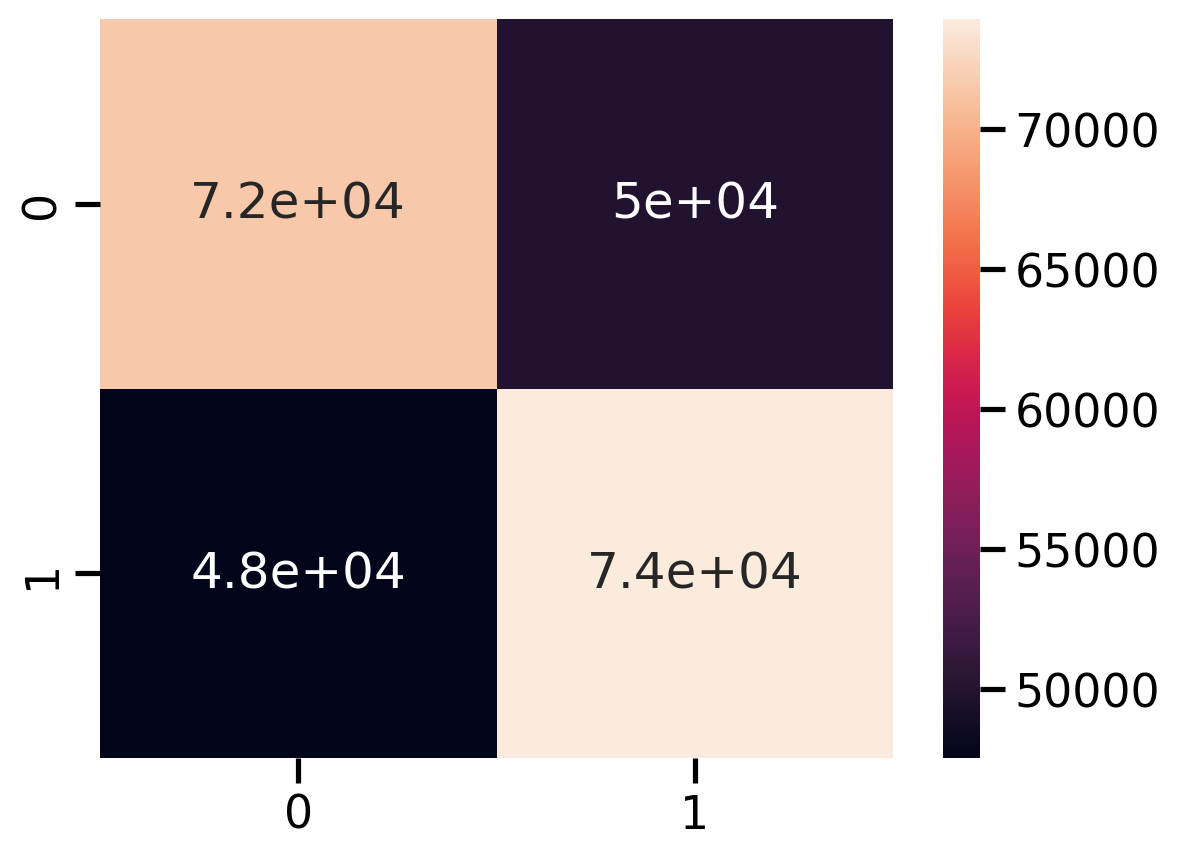

In [43]:
# Construct the Confusion Matrix and the classification report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True);
print(classification_report(y_test,y_pred))

# # Display the accuracy upto 2 decimal places
print( "Training Accuracy for the Logistic Regression model is: {:.2f}%".format(accuracy_score(y_train, LR_model.predict(X_train))*100) ) 
print( "Test Accuracy for the Logistic Regressionat model is: {:.2f}%".format(accuracy_score(y_test, y_pred)*100) ) 

The Logistic Regression model exhibits a near-even performance for both classes in the dataset. For class 0 (no delay), the precision is 0.60, suggesting that 60% of the flights predicted as "no delay" were correctly identified. The recall of 0.59 implies that out of all the actual "no delay" flights, the model correctly identified 59% of them. For class 1 (delay >15 minutes), the precision is also 0.60, indicating that 60% of the flights predicted as "delayed" were truly delayed. The recall for class 1 is slightly better at 0.61, showing the model correctly identified 61% of the true delayed flights. The F1-score, which provides a balanced measure of precision and recall, stands at 0.59 for class 0 and 0.60 for class 1. Overall, the model achieves an accuracy of 59.90% on the test data, closely mirroring the training accuracy of 59.89%.

<br>

### Random Forest Classifier

The random forest algorithm employs a collection of multiple decision trees to produce its predictions. One of the notable advantages of this algorithm is its ability to recognize non-linear patterns, mitigate overfitting when judiciously selecting variables, and effectively handle datasets with imbalanced class distributions, a characteristic evident in the delay prediction dataset as described by (Choi et al., 2016). The application of the random forest technique for predicting flight delays has been explored by researchers such as (Gui et al., 2020), (Choi et al., 2016), and (Hu, Zhang and Li, 2021). Two critical parameters influencing its performance include the depth of each individual tree and the total number of trees in the forest. 

In [45]:
# Find the optimal value for n_estimators
scores= []
for k in range(3,20,4):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [48]:
scores

[0.8607820612588576, 0.8962288622355077, 0.9092440019598882, 0.9158606832433679, 0.9213450761927113]

The maximun accuracy is 0.9213450761927113 for the n_estimatore=4



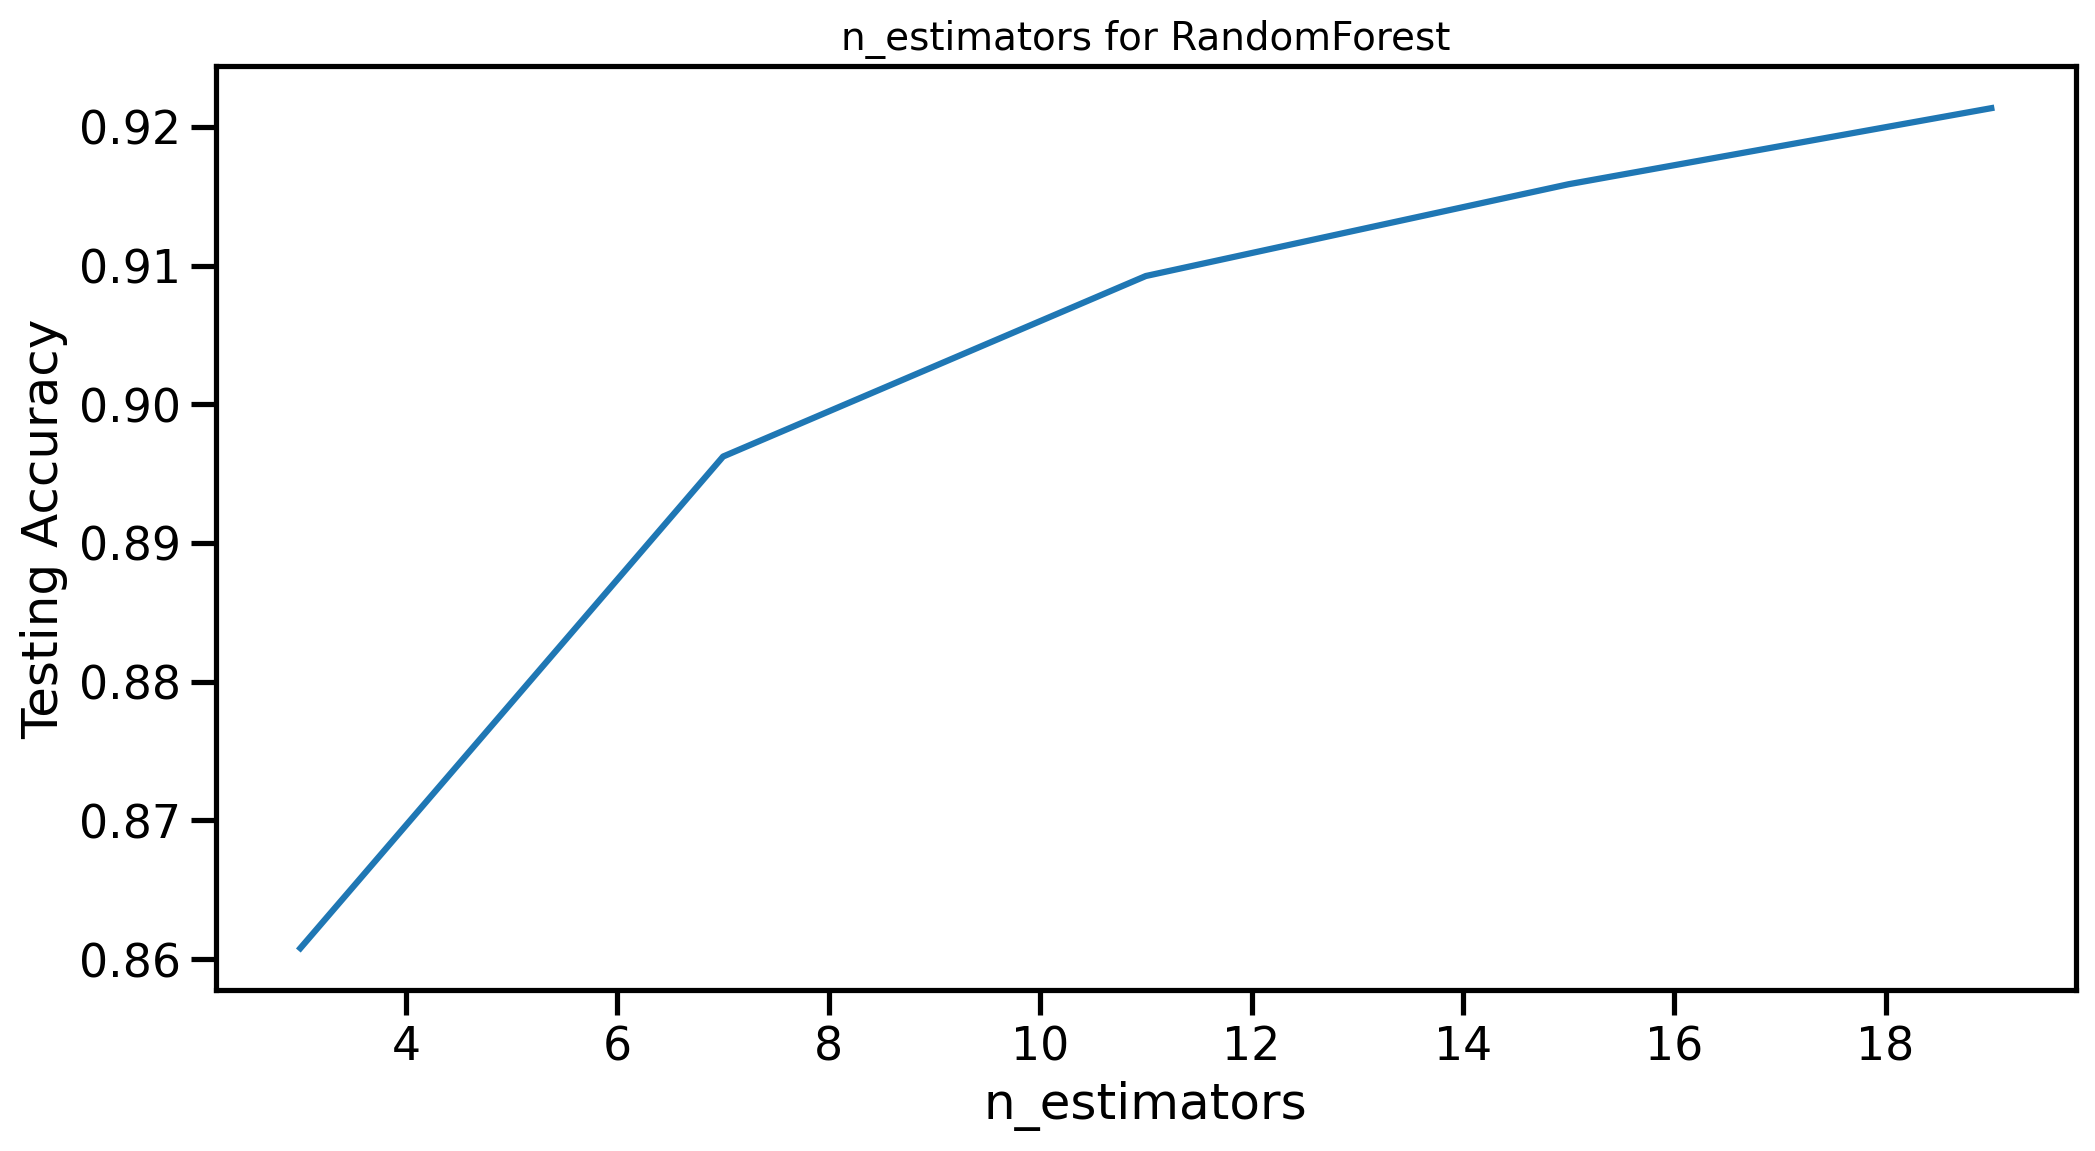

In [51]:
# Visualise the accuracy based on the number of estimators
plt.figure(figsize=(12,6))
plt.title('n_estimators for RandomForest',fontsize =14)
plt.plot(range(3,20,4),scores)
plt.xlabel('n_estimators')
plt.ylabel('Testing Accuracy')
print(f'The maximun accuracy is {max(scores)} for the n_estimatore={scores.index(max(scores))}\n')
plt.show()

The value 11 was chosen for n_estimators to avoid overfitting.

              precision    recall  f1-score   support

           0       0.96      0.86      0.90    121398
           1       0.87      0.96      0.91    121473

    accuracy                           0.91    242871
   macro avg       0.91      0.91      0.91    242871
weighted avg       0.91      0.91      0.91    242871

Training Accuracy for Random Forest at n_estimators = 11 is: 99.93%
Test Accuracy for Random Forest at n_estimators = 11 is: 90.91%


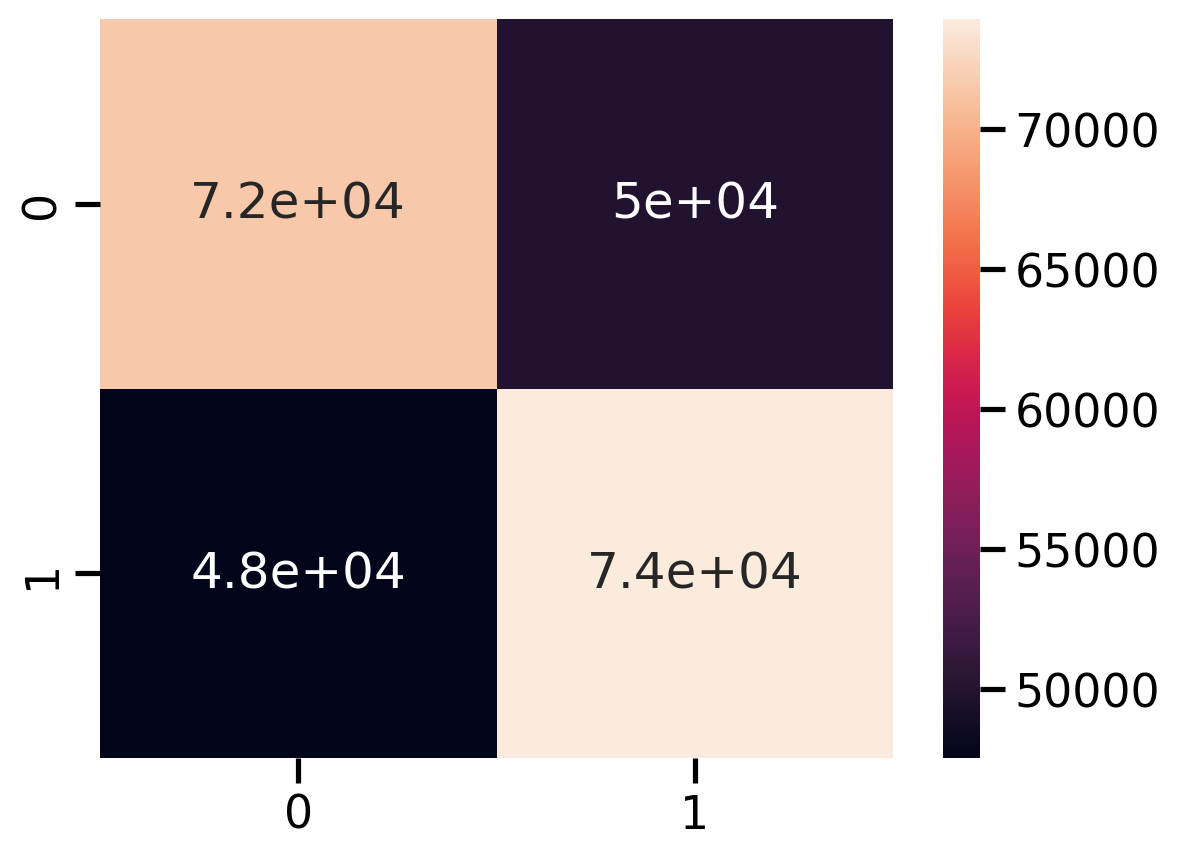

In [55]:
# Creat the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=11)
clf.fit(X_train,y_train)

# DecisionTree Parameters
# pprint.pprint(clf.get_params())

# predicition vale
y_pred = clf.predict(X_test)

print('\n Accuracy',metrics.accuracy_score(y_test,y_pred)*100)

# Plot the Confusion matrix
cm2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_pred))

# Model accuracy
print( "Training Accuracy for Random Forest at n_estimators = 11 is: {:.2f}%".format(accuracy_score(y_train, classifier.predict(X_train))*100) ) 
print( "Test Accuracy for Random Forest at n_estimators = 11 is: {:.2f}%".format(accuracy_score(y_test, y_pred)*100) )

The Random Forest classifier performs admirably with n-estimators =11, achieving a high accuracy on both training (99%) and test sets (90.9%). The difference in accuracy between training and test suggests the model might be slightly overfitting, but the test accuracy remains commendably high. While the model excels at predicting delays (with a recall of 96%), there’s a minor trade-off in predicting flights without delays (with an 86% recall). The results showcase the model's efficacy in classifying flight delays due to weather conditions. Future work might consider fine-tuning or regularization to curb the potential overfitting.